In [1]:
import copy
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d
from PIL import Image

In [2]:
depth = np.load('goal/100.npy')
rgb = np.array(Image.open('goal/100.png'))

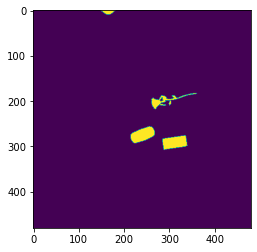

In [3]:
plt.imshow(depth < 0.333)

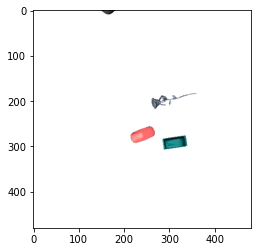

In [4]:
_rgb = copy.deepcopy(rgb)
_rgb[depth > 0.333] = [255, 255, 255]
plt.imshow(_rgb)

In [5]:
fovy = 45
width, height = 480, 480

f = 0.5 * height / np.tan(fovy * np.pi / 360)
K = np.array([[f, 0, width / 2], 
              [0, f, height / 2], 
              [0, 0, 1]])

### PC

In [6]:
pcd = []
for i in range(height):
    for j in range(width):
        if depth[i, j] > 0.333:
            continue
        z = 0.6 - depth[i, j]
        x = (j - width / 2) * z / f
        y = (height / 2 - i) * z / f
        pcd.append([x, y, z])

In [8]:
pcd_o3d = o3d.geometry.PointCloud()
pcd_o3d.points = o3d.utility.Vector3dVector(pcd)
o3d.visualization.draw_geometries([pcd_o3d])

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


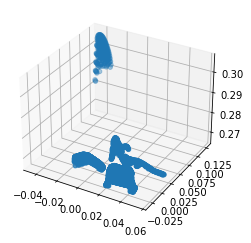

In [11]:
pcd = np.array(pcd)
ax = plt.axes(projection='3d')
ax.scatter3D(pcd[:, 0], pcd[:, 1], pcd[:, 2])

### Colored PC

In [9]:
pcd = []
colors = []
for i in range(height):
    for j in range(width):
        if depth[i, j] > 0.333:
            continue
        z = 0.6 - depth[i, j]
        x = (j - width / 2) * z / f
        y = (height / 2 - i) * z / f
        pcd.append([x, y, z])
        
        colors.append(rgb[i][j] / 255)

In [10]:
pcd_o3d = o3d.geometry.PointCloud() 
pcd_o3d.points = o3d.utility.Vector3dVector(pcd)
pcd_o3d.colors = o3d.utility.Vector3dVector(colors)
o3d.visualization.draw_geometries([pcd_o3d])

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


In [12]:
dir(o3d.visualization)

['Color',
 'Default',
 'EV',
 'ExternalVisualizer',
 'Material',
 'MeshColorOption',
 'MeshShadeOption',
 'Normal',
 'O3DVisualizer',
 'PickedPoint',
 'PointColorOption',
 'RenderOption',
 'ScalarProperties',
 'SelectedIndex',
 'SelectionPolygonVolume',
 'TextureMaps',
 'VectorProperties',
 'ViewControl',
 'Visualizer',
 'VisualizerWithEditing',
 'VisualizerWithKeyCallback',
 'VisualizerWithVertexSelection',
 'XCoordinate',
 'YCoordinate',
 'ZCoordinate',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_external_visualizer',
 'app',
 'draw',
 'draw_geometries',
 'draw_geometries_with_animation_callback',
 'draw_geometries_with_custom_animation',
 'draw_geometries_with_editing',
 'draw_geometries_with_key_callbacks',
 'draw_geometries_with_vertex_selection',
 'gui',
 'open3d',
 'read_selection_polygon_volume',
 'rendering',
 'webrtc_server']

In [ ]:
R = np.eye(3)
T = np.zeros(3)

[x_RGB, y_RGB, z_RGB] = np.linalg.inv(R).dot([x, y, z]) - np.linalg.inv(R).dot(T)

In [ ]:

colors = []
pcd = []
for i in range(height):
    for j in range(width):
        """
            Convert the pixel from depth coordinate system
            to depth sensor 3D coordinate system
        """
        z = depth_image[i][j]
        x = (j - CX_DEPTH) * z / FX_DEPTH
        y = (i - CY_DEPTH) * z / FY_DEPTH

        """
            Convert the point from depth sensor 3D coordinate system
            to rgb camera coordinate system:
        """
        [x_RGB, y_RGB, z_RGB] = np.linalg.inv(R).dot([x, y, z]) - np.linalg.inv(R).dot(T)

        """
            Convert from rgb camera coordinates system
            to rgb image coordinates system:
        """
        j_rgb = int((x_RGB * FX_RGB) / z_RGB + CX_RGB + width / 2)
        i_rgb = int((y_RGB * FY_RGB) / z_RGB + CY_RGB)

        # Add point to point cloud:
        pcd.append([x, y, z])

        # Add the color of the pixel if it exists:
        if 0 <= j_rgb < width and 0 <= i_rgb < height:
            colors.append(rgb_image[i_rgb][j_rgb] / 255)
        else:
            colors.append([0., 0., 0.])
            
# Convert to Open3D.PointCLoud:
pcd_o3d = o3d.geometry.PointCloud()  # create a point cloud object
pcd_o3d.points = o3d.utility.Vector3dVector(pcd)
pcd_o3d.colors = o3d.utility.Vector3dVector(colors)
# Visualize:
o3d.visualization.draw_geometries([pcd_o3d])
view rawcolored_point_cloud.py hosted with ❤ by GitHub